In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor

from torchvision.datasets import MNIST        
import torchvision.transforms as transforms 

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(trainset.data.min(), trainset.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(trainset.data.float().mean(), trainset.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(trainset.data.float().mean() / 255, trainset.data.float().std() / 255))

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor

trainset = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=ToTensor(),  # transform : convert image to tensor. Normalized to 0~1
                          download=True)

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(trainset.data.min(), trainset.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(trainset.data.float().mean(), trainset.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(trainset.data.float().mean() / 255, trainset.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


In [24]:
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
# images, labels = next(iter(trainset))
images, labels = trainset[0]

In [18]:
images.shape 

torch.Size([1, 28, 28])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [20]:
image = torch_image.numpy()
image.shape

(28, 28)

In [21]:
labels

5

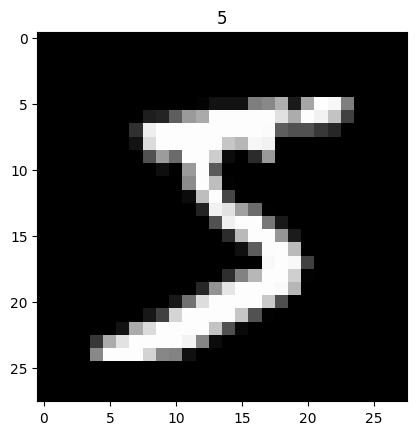

In [22]:
plt.title(labels)
plt.imshow(image,'gray')
plt.show()

In [34]:
from network import simpleMLP, TrainModel, Vis_Model
folder_path = "/home/syoon/Research/PRAM-weight-biasing/tests/TestRun/Test_2024-08-01 11:44:57"


In [36]:

best_model = Vis_Model('best_model.pth', folder_path)
best_model.Vis_weight()

AttributeError: 'Vis_Model' object has no attribute 'device'

In [1]:
import torch
import random
import os

# import customized files
from network import PruneModel, TrainModel, Vis_Model

from PyTorch_CIFAR10.cifar10_models.resnet import resnet18

In [20]:
model_name = resnet18(pretrained=True)

In [3]:
model_name

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
premodel = model_name

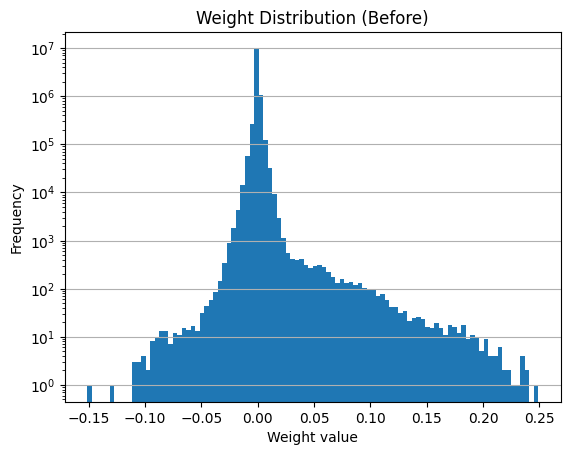

In [23]:
import matplotlib.pyplot as plt

all_weights = []
for name, param in premodel.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()


In [22]:
total_params = 0
zero_params = 0
# Iterate over all modules and sum total and zeroed-out parameters
for name, module in premodel.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        total_params += module.weight.numel()
        zero_params += torch.sum(module.weight == 0).item()
global_sparsity = zero_params / total_params  # Sparsity ratio

print(f"Global Sparsity: {global_sparsity:.2%}")

Global Sparsity: 0.00%


In [16]:
import torch.nn as nn
import torch.nn.utils.prune as prune

def apply_global_pruning(model, amount):
    parameters_to_prune = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, 'weight'))

    # Apply global pruning
    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=amount,
    )
    
    for name, module in model.named_modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                prune.remove(module, 'weight') # fix pruned weights

    # Save the model
    torch.save(model, 'resnet_pruned_test.pth')

In [17]:
# Apply pruning to the model (e.g., pruning 40% of the weights globally)
apply_global_pruning(premodel, amount=0.6)

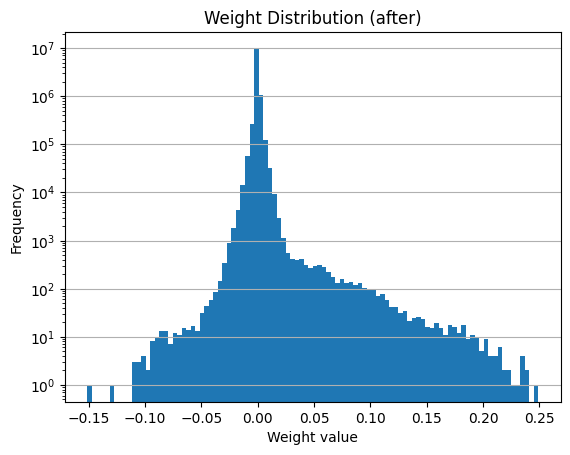

In [18]:
postmodel = torch.load('resnet_pruned_test.pth')

all_weights = []
for name, param in postmodel.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (after)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()


In [19]:
total_params = 0
zero_params = 0
# Iterate over all modules and sum total and zeroed-out parameters
for name, module in postmodel.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        total_params += module.weight.numel()
        zero_params += torch.sum(module.weight == 0).item()
global_sparsity = zero_params / total_params  # Sparsity ratio

print(f"Global Sparsity: {global_sparsity:.2%}")

Global Sparsity: 64.00%
